## SETTINGS

In [1]:
# 폰트 설치
!apt-get install -y fonts-nanum
!fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 0 not upgraded.
Font directories:
	/root/.local/share/fonts
	/usr/local/share/fonts
	/usr/share/fonts
	/root/.fonts
	/usr/share/fonts/truetype
	/usr/share/fonts/truetype/dejavu
	/usr/share/fonts/truetype/liberation
	/usr/share/fonts/truetype/nanum
/root/.local/share/fonts: skipping, no such directory
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/dejavu: caching, new cache contents: 22 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/root/.fonts: skipping, no such directory
/usr/shar

In [43]:
modin.shutdown()


NameError: name 'modin' is not defined

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
mpl.rc('font', family='NanumBarunGothic') # 혹은 다른 설치한 Nanum 폰트 사용
import matplotlib.font_manager as fm
# 설치된 폰트 중 'NanumGothic' 찾기
for font in fm.fontManager.ttflist:
    if 'NanumGothic' in font.name:
        plt.rcParams['font.family'] = font.name
        break
plt.rcParams['axes.unicode_minus'] = False
import seaborn as sns
import numpy as np
import scipy.stats as stats

In [6]:
pip install ray

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.1/66.1 MB 15.3 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 409.3/409.3 kB 295.3 kB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install modin

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.9 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [9]:
pip install -U ipywidgets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 1.4 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.0/215.0 kB 3.2 MB/s eta 0:00:00ta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 5.1 MB/s eta 0:00:00:00:0100:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
import ray
ray.init(num_cpus=4)

2024-05-15 08:47:46,041	WARNING services.py:2009 -- WARNING: The object store is using /tmp instead of /dev/shm because /dev/shm has only 67108864 bytes available. This will harm performance! You may be able to free up space by deleting files in /dev/shm. If you are inside a Docker container, you can increase /dev/shm size by passing '--shm-size=4.55gb' to 'docker run' (or add it to the run_options list in a Ray cluster config). Make sure to set this to more than 30% of available RAM.
2024-05-15 08:47:47,176	INFO worker.py:1749 -- Started a local Ray instance.


Python version:,3.11.9
Ray version:,2.22.0


In [2]:
import modin.pandas as pd

2024-05-15 08:11:40,951	WARNING services.py:2009 -- WARNING: The object store is using /tmp instead of /dev/shm because /dev/shm has only 67108864 bytes available. This will harm performance! You may be able to free up space by deleting files in /dev/shm. If you are inside a Docker container, you can increase /dev/shm size by passing '--shm-size=4.56gb' to 'docker run' (or add it to the run_options list in a Ray cluster config). Make sure to set this to more than 30% of available RAM.
2024-05-15 08:11:42,086	INFO worker.py:1749 -- Started a local Ray instance.


## 전국 인구 대비 희귀난치성 질환자 수 비교하기

In [6]:
pip install grpcio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 28.2 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


### 대상 데이터 프레임 전처리

In [3]:
df_polulation = pd.read_csv("../csv/2012_2021_연령대별_전국인구.csv")

In [4]:
df_polulation = df_polulation.drop('항목',axis=1)
df_polulation = df_polulation.drop(index=0)
df_polulation = df_polulation.reset_index(drop=True)
df_polulation[:2]

,시점,계,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,35 - 39세,...,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,2012,50948272,2321293,2347418,2955976,3491303,3319540,3307408,4062598,4106345,...,3386102,2428603,1899933,1774343,1196000,663632,301459,106586,25450,12657
1,2013,51141463,2301320,2322614,2809185,3420530,3405202,3184327,4086122,3929292,...,3621186,2486668,1985888,1803037,1269763,708188,323430,120230,26657,13793


In [5]:
df_polulation.iloc[:, 1:] = df_polulation.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
df_polulation

,시점,계,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,35 - 39세,...,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85 - 89세,90 - 94세,95 - 99세,100+
0,2012,50948272,2321293,2347418,2955976,3491303,3319540,3307408,4062598,4106345,...,3386102,2428603,1899933,1774343,1196000,663632,301459,106586,25450,12657
1,2013,51141463,2301320,2322614,2809185,3420530,3405202,3184327,4086122,3929292,...,3621186,2486668,1985888,1803037,1269763,708188,323430,120230,26657,13793
2,2014,51327916,2294304,2297070,2663025,3325879,3488497,3153547,3917451,3894396,...,3845570,2626763,2079345,1800922,1345682,766736,357407,126692,28817,15006
3,2015,51529338,2266781,2334907,2459825,3257264,3557583,3141465,3731387,3939579,...,4035650,2881662,2191617,1789894,1386543,838507,386703,134214,31414,16209
4,2016,51696216,2204271,2361897,2349979,3131059,3541061,3217367,3517868,4016272,...,4242269,3139076,2237345,1781229,1457890,909130,416164,141488,34844,17562
5,2017,51778544,2079115,2356083,2350767,2953658,3486427,3324540,3311945,4056704,...,4336808,3310243,2347021,1793132,1585974,968146,451453,153236,39294,17850
6,2018,51826059,1974244,2328818,2325548,2805605,3414902,3409071,3189361,4080782,...,4338291,3542849,2406790,1880192,1617744,1032594,484398,165694,44213,18783
7,2019,51849861,1845122,2321792,2299958,2659052,3319645,3490711,3158230,3912794,...,4307786,3765035,2545616,1972502,1623542,1103019,530317,185868,45891,20160
8,2020,51829023,1677023,2293047,2337589,2455747,3249676,3556477,3145998,3727119,...,4226286,3950469,2794037,2080134,1618112,1143935,585487,203704,48756,21912
9,2021,51638809,1530469,2229881,2364196,2345120,3121322,3534601,3216061,3507374,...,4108389,4136749,3027963,2109712,1605372,1201825,633656,217247,47297,7961


In [6]:
df_polulation['85세 이상'] = df_polulation[['85 - 89세', '90 - 94세', '95 - 99세', '100+']].sum(axis=1)
df_polulation.drop(['85 - 89세', '90 - 94세', '95 - 99세', '100+'], axis=1, inplace=True)
df_polulation[:2]

,시점,계,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,35 - 39세,40 - 44세,45 - 49세,50 - 54세,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85세 이상
0,2012,50948272,2321293,2347418,2955976,3491303,3319540,3307408,4062598,4106345,4639747,4196411,4405468,3386102,2428603,1899933,1774343,1196000,663632,446152
1,2013,51141463,2301320,2322614,2809185,3420530,3405202,3184327,4086122,3929292,4599684,4320277,4404070,3621186,2486668,1985888,1803037,1269763,708188,484110


In [7]:
df_polulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시점        10 non-null     object
 1   계         10 non-null     object
 2   0 - 4세    10 non-null     object
 3   5 - 9세    10 non-null     object
 4   10 - 14세  10 non-null     object
 5   15 - 19세  10 non-null     object
 6   20 - 24세  10 non-null     object
 7   25 - 29세  10 non-null     object
 8   30 - 34세  10 non-null     object
 9   35 - 39세  10 non-null     object
 10  40 - 44세  10 non-null     object
 11  45 - 49세  10 non-null     object
 12  50 - 54세  10 non-null     object
 13  55 - 59세  10 non-null     object
 14  60 - 64세  10 non-null     object
 15  65 - 69세  10 non-null     object
 16  70 - 74세  10 non-null     object
 17  75 - 79세  10 non-null     object
 18  80 - 84세  10 non-null     object
 19  85세 이상    10 non-null     object
dtypes: object(20)
memory usage: 1.7+ KB


In [8]:
df_rare_disease = pd.read_csv("../csv/2012_2021_연령별_희귀난치성질환자수.csv")

In [9]:
df_rare_disease = df_rare_disease.drop(['성별(1)','질병별(1)'],axis=1)
df_rare_disease = df_rare_disease.drop(index=0)
df_rare_disease = df_rare_disease.reset_index(drop=True)
df_rare_disease[:2]

,시점,계,0세,1 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,...,40 - 44세,45 - 49세,50 - 54세,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85세 이상
0,2012,589455,3171,8170,6079,7018,12245,18561,24294,33380,...,46601,45800,57574,56597,50834,48340,55158,42903,23120,11183
1,2013,631417,3541,9789,6389,7246,12611,19615,24208,34704,...,48604,49386,60316,62318,54192,52819,58771,48464,26980,13352


In [10]:
df_rare_disease.iloc[:, 1:] = df_rare_disease.iloc[:, 1:].apply(pd.to_numeric, errors='coerce')
df_rare_disease[:2]

,시점,계,0세,1 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,...,40 - 44세,45 - 49세,50 - 54세,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85세 이상
0,2012,589455,3171,8170,6079,7018,12245,18561,24294,33380,...,46601,45800,57574,56597,50834,48340,55158,42903,23120,11183
1,2013,631417,3541,9789,6389,7246,12611,19615,24208,34704,...,48604,49386,60316,62318,54192,52819,58771,48464,26980,13352


In [11]:
df_rare_disease['0 - 4세'] = df_rare_disease['0세'] + df_rare_disease['1 - 4세']
df_rare_disease.drop(['0세', '1 - 4세'], axis=1, inplace=True)
df_rare_disease[:2]

,시점,계,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,35 - 39세,40 - 44세,45 - 49세,50 - 54세,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85세 이상,0 - 4세
0,2012,589455,6079,7018,12245,18561,24294,33380,38427,46601,45800,57574,56597,50834,48340,55158,42903,23120,11183,11341
1,2013,631417,6389,7246,12611,19615,24208,34704,38112,48604,49386,60316,62318,54192,52819,58771,48464,26980,13352,13330


In [12]:
new_col = df_rare_disease['0 - 4세']
df_rare_disease.drop(['0 - 4세'], axis=1, inplace=True)
df_rare_disease.insert(2, '0 - 4세', new_col)
df_rare_disease

,시점,계,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,35 - 39세,40 - 44세,45 - 49세,50 - 54세,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85세 이상
0,2012,589455,11341,6079,7018,12245,18561,24294,33380,38427,46601,45800,57574,56597,50834,48340,55158,42903,23120,11183
1,2013,631417,13330,6389,7246,12611,19615,24208,34704,38112,48604,49386,60316,62318,54192,52819,58771,48464,26980,13352
2,2014,680712,16026,7318,7775,13152,21252,25290,34620,39016,50580,52760,62184,69143,59728,57923,61511,54568,31594,16272
3,2015,707926,18171,7478,7409,13157,21867,25463,33131,39262,49591,54177,61747,72504,66243,62534,62853,57597,36214,18528
4,2016,743082,21031,8939,8136,13758,22360,26371,31913,40331,47997,56803,60922,76938,73048,66173,64348,62253,41020,20741
5,2017,767969,21192,9669,8552,13239,21863,26436,29988,40172,46811,57391,60006,77773,76635,69621,65711,70164,46811,25935
6,2018,833219,20481,10459,8834,13382,22594,28258,30118,42630,46178,59391,64356,80707,84752,74567,72976,78759,58189,36588
7,2019,884261,19463,11123,9395,13705,23019,30690,31682,42624,47600,60979,67425,81853,92064,80781,78976,82476,65819,44587
8,2020,868801,12295,11122,9590,13157,23092,32588,33034,41754,48782,60868,69237,80606,95901,87784,81812,75991,57170,34018
9,2021,931621,11351,11885,11228,14139,25153,35698,37365,42970,52792,61712,74537,81242,103272,98513,86961,79779,63746,39278


In [13]:
df_rare_disease.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시점        10 non-null     object
 1   계         10 non-null     object
 2   0 - 4세    10 non-null     object
 3   5 - 9세    10 non-null     object
 4   10 - 14세  10 non-null     object
 5   15 - 19세  10 non-null     object
 6   20 - 24세  10 non-null     object
 7   25 - 29세  10 non-null     object
 8   30 - 34세  10 non-null     object
 9   35 - 39세  10 non-null     object
 10  40 - 44세  10 non-null     object
 11  45 - 49세  10 non-null     object
 12  50 - 54세  10 non-null     object
 13  55 - 59세  10 non-null     object
 14  60 - 64세  10 non-null     object
 15  65 - 69세  10 non-null     object
 16  70 - 74세  10 non-null     object
 17  75 - 79세  10 non-null     object
 18  80 - 84세  10 non-null     object
 19  85세 이상    10 non-null     object
dtypes: object(20)
memory usage: 1.7+ KB


In [14]:
df_polulation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 20 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   시점        10 non-null     object
 1   계         10 non-null     object
 2   0 - 4세    10 non-null     object
 3   5 - 9세    10 non-null     object
 4   10 - 14세  10 non-null     object
 5   15 - 19세  10 non-null     object
 6   20 - 24세  10 non-null     object
 7   25 - 29세  10 non-null     object
 8   30 - 34세  10 non-null     object
 9   35 - 39세  10 non-null     object
 10  40 - 44세  10 non-null     object
 11  45 - 49세  10 non-null     object
 12  50 - 54세  10 non-null     object
 13  55 - 59세  10 non-null     object
 14  60 - 64세  10 non-null     object
 15  65 - 69세  10 non-null     object
 16  70 - 74세  10 non-null     object
 17  75 - 79세  10 non-null     object
 18  80 - 84세  10 non-null     object
 19  85세 이상    10 non-null     object
dtypes: object(20)
memory usage: 1.7+ KB


### 해당 데이터로 비율 비교

In [15]:
# 해당 연도 별 및 연령대 별 전국민 인구수 대비 희귀질환자의 비율
ratio_df = (df_rare_disease.iloc[:, 1:]/df_polulation.iloc[:, 1:]) * 100
ratio_df = ratio_df.astype(float)
# 소수점 2자리 이하 반올림
ratio_df = ratio_df.round(2)
ratio_df.insert(0, '연도별', df_polulation['시점'])
ratio_df

,연도별,계,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,35 - 39세,40 - 44세,45 - 49세,50 - 54세,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85세 이상
0,2012,1.16,0.49,0.26,0.24,0.35,0.56,0.73,0.82,0.94,1.00,1.09,1.31,1.67,2.09,2.54,3.11,3.59,3.48,2.51
1,2013,1.23,0.58,0.28,0.26,0.37,0.58,0.76,0.85,0.97,1.06,1.14,1.37,1.72,2.18,2.66,3.26,3.82,3.81,2.76
2,2014,1.33,0.70,0.32,0.29,0.40,0.61,0.80,0.88,1.00,1.12,1.20,1.42,1.80,2.27,2.79,3.42,4.06,4.12,3.08
3,2015,1.37,0.80,0.32,0.30,0.40,0.61,0.81,0.89,1.00,1.13,1.21,1.44,1.80,2.30,2.85,3.51,4.15,4.32,3.26
4,2016,1.44,0.95,0.38,0.35,0.44,0.63,0.82,0.91,1.00,1.14,1.24,1.46,1.81,2.33,2.96,3.61,4.27,4.51,3.40
5,2017,1.48,1.02,0.41,0.36,0.45,0.63,0.80,0.91,0.99,1.14,1.24,1.44,1.79,2.32,2.97,3.66,4.42,4.84,3.92
6,2018,1.61,1.04,0.45,0.38,0.48,0.66,0.83,0.94,1.04,1.18,1.30,1.50,1.86,2.39,3.10,3.88,4.87,5.64,5.13
7,2019,1.71,1.05,0.48,0.41,0.52,0.69,0.88,1.00,1.09,1.23,1.35,1.55,1.90,2.45,3.17,4.00,5.08,5.97,5.70
8,2020,1.68,0.73,0.49,0.41,0.54,0.71,0.92,1.05,1.12,1.24,1.39,1.57,1.91,2.43,3.14,3.93,4.70,5.00,3.96
9,2021,1.80,0.74,0.53,0.47,0.60,0.81,1.01,1.16,1.23,1.32,1.48,1.65,1.98,2.50,3.25,4.12,4.97,5.30,4.33


In [16]:
new_rate_df = pd.DataFrame(columns=ratio_df.columns)
new_rate_df['연도별'] = ratio_df['연도별']
# 증감률 계산: ratio_df의 각 열에 대해 이전 행과의 차이를 계산하여 백분율로 변환
for column in ratio_df.columns[1:]:  # '연도별' 열을 제외하고 반복
    new_rate_df[column] = (ratio_df[column] - ratio_df[column].shift(1)) / ratio_df[column].shift(1) * 100
# 증감률 반올림
new_rate_df = new_rate_df.round(2)
new_rate_df

,연도별,계,0 - 4세,5 - 9세,10 - 14세,15 - 19세,20 - 24세,25 - 29세,30 - 34세,35 - 39세,40 - 44세,45 - 49세,50 - 54세,55 - 59세,60 - 64세,65 - 69세,70 - 74세,75 - 79세,80 - 84세,85세 이상
0,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013,6.03,18.37,7.69,8.33,5.71,3.57,4.11,3.66,3.19,6.00,4.59,4.58,2.99,4.31,4.72,4.82,6.41,9.48,9.96
2,2014,8.13,20.69,14.29,11.54,8.11,5.17,5.26,3.53,3.09,5.66,5.26,3.65,4.65,4.13,4.89,4.91,6.28,8.14,11.59
3,2015,3.01,14.29,0.00,3.45,0.00,0.00,1.25,1.14,0.00,0.89,0.83,1.41,0.00,1.32,2.15,2.63,2.22,4.85,5.84
4,2016,5.11,18.75,18.75,16.67,10.00,3.28,1.23,2.25,0.00,0.88,2.48,1.39,0.56,1.30,3.86,2.85,2.89,4.40,4.29
5,2017,2.78,7.37,7.89,2.86,2.27,0.00,-2.44,0.00,-1.00,0.00,0.00,-1.37,-1.10,-0.43,0.34,1.39,3.51,7.32,15.29
6,2018,8.78,1.96,9.76,5.56,6.67,4.76,3.75,3.30,5.05,3.51,4.84,4.17,3.91,3.02,4.38,6.01,10.18,16.53,30.87
7,2019,6.21,0.96,6.67,7.89,8.33,4.55,6.02,6.38,4.81,4.24,3.85,3.33,2.15,2.51,2.26,3.09,4.31,5.85,11.11
8,2020,-1.75,-30.48,2.08,0.00,3.85,2.90,4.55,5.00,2.75,0.81,2.96,1.29,0.53,-0.82,-0.95,-1.75,-7.48,-16.25,-30.53
9,2021,7.14,1.37,8.16,14.63,11.11,14.08,9.78,10.48,9.82,6.45,6.47,5.10,3.66,2.88,3.50,4.83,5.74,6.00,9.34


In [17]:
ratio_df_sort = ratio_df[['연도별', '계']]
ratio_df_sort

,연도별,계
0,2012,1.16
1,2013,1.23
2,2014,1.33
3,2015,1.37
4,2016,1.44
5,2017,1.48
6,2018,1.61
7,2019,1.71
8,2020,1.68
9,2021,1.80


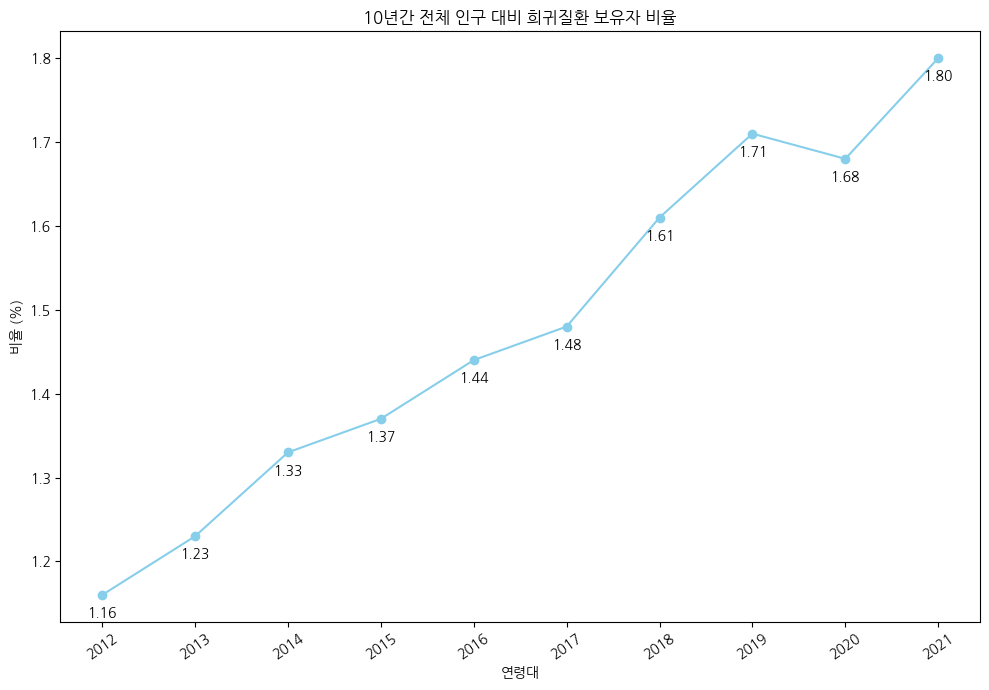

In [18]:
plt.figure(figsize=(10, 7))  # 그래프 크기 설정
plt.plot(ratio_df_sort['연도별'], ratio_df_sort['계'], marker='o', color='skyblue') 

# 각 점에 값 표시
for i in range(len(ratio_df_sort)):
 plt.text(ratio_df_sort['연도별'][i], ratio_df_sort['계'][i] - 0.03, f"{ratio_df_sort['계'][i]:.2f}", ha='center', va='bottom')

plt.title('10년간 전체 인구 대비 희귀질환 보유자 비율')  # 그래프 제목
plt.xlabel('연령대')  # x축 라벨
plt.ylabel('비율 (%)')  # y축 라벨
plt.xticks(rotation=35)  # x축 라벨 회전
plt.tight_layout()  # 레이아웃 조정
plt.show()  # 그래프 표시

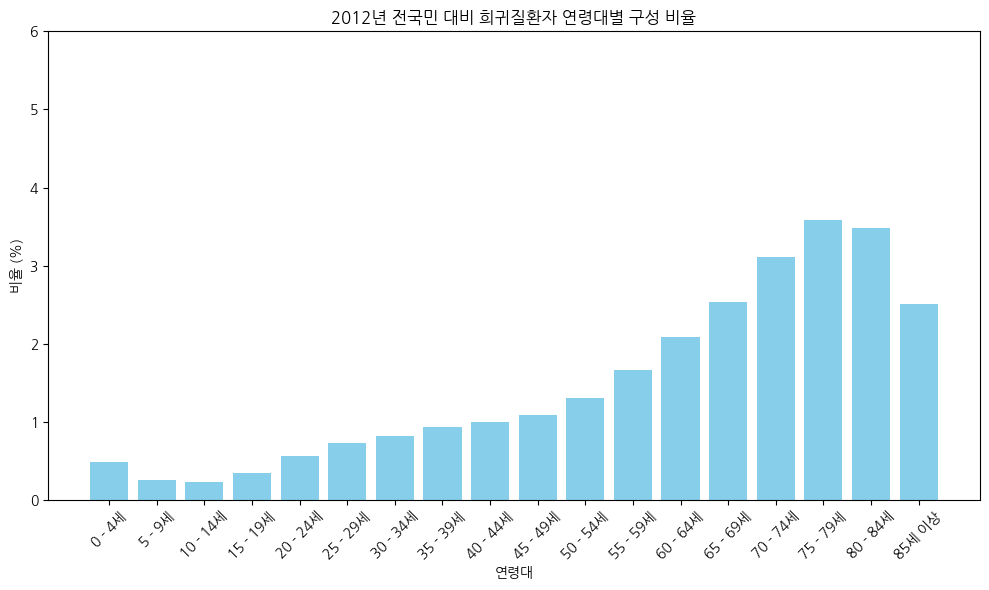

In [19]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.bar(ratio_df.iloc[0, 2:].index, ratio_df.iloc[0, 2:].values, color='skyblue') 
plt.title('2012년 전국민 대비 희귀질환자 연령대별 구성 비율')  # 그래프 제목
plt.xlabel('연령대')  # x축 라벨
plt.ylabel('비율 (%)')  # y축 라벨
plt.xticks(rotation=45)  # x축 라벨 회전
plt.ylim(0, 6)  # y축 범위 설정
plt.tight_layout()  # 레이아웃 조정
plt.show()  # 그래프 표시

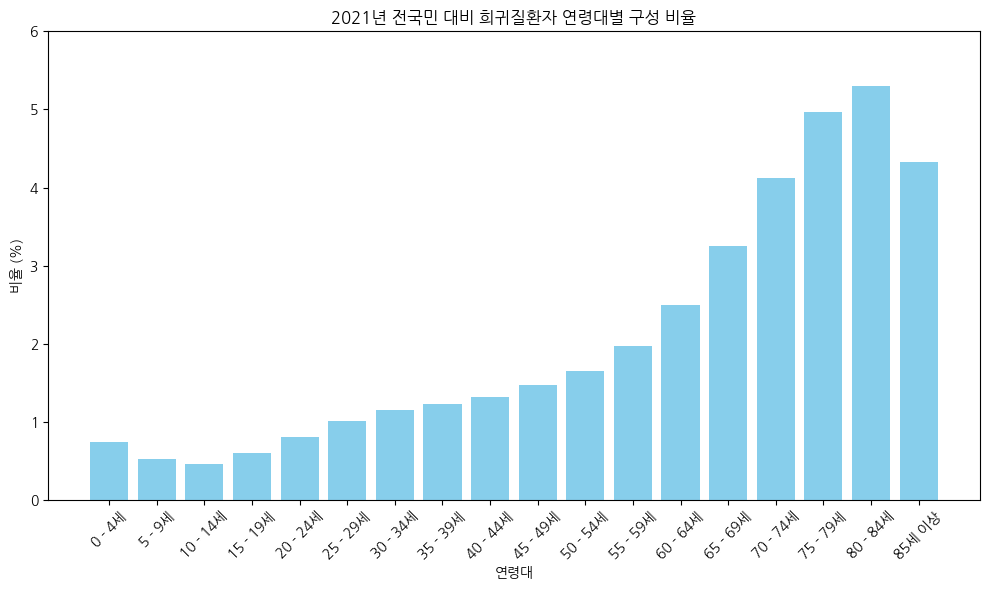

In [20]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.bar(ratio_df.iloc[9, 2:].index, ratio_df.iloc[9, 2:].values, color='skyblue') 
plt.title('2021년 전국민 대비 희귀질환자 연령대별 구성 비율')  # 그래프 제목
plt.xlabel('연령대')  # x축 라벨
plt.ylabel('비율 (%)')  # y축 라벨
plt.xticks(rotation=45)  # x축 라벨 회전
plt.ylim(0, 6)  # y축 범위 설정
plt.tight_layout()  # 레이아웃 조정
plt.show()  # 그래프 표시

In [21]:
age_avg = ratio_df.iloc[:, 2:].mean()

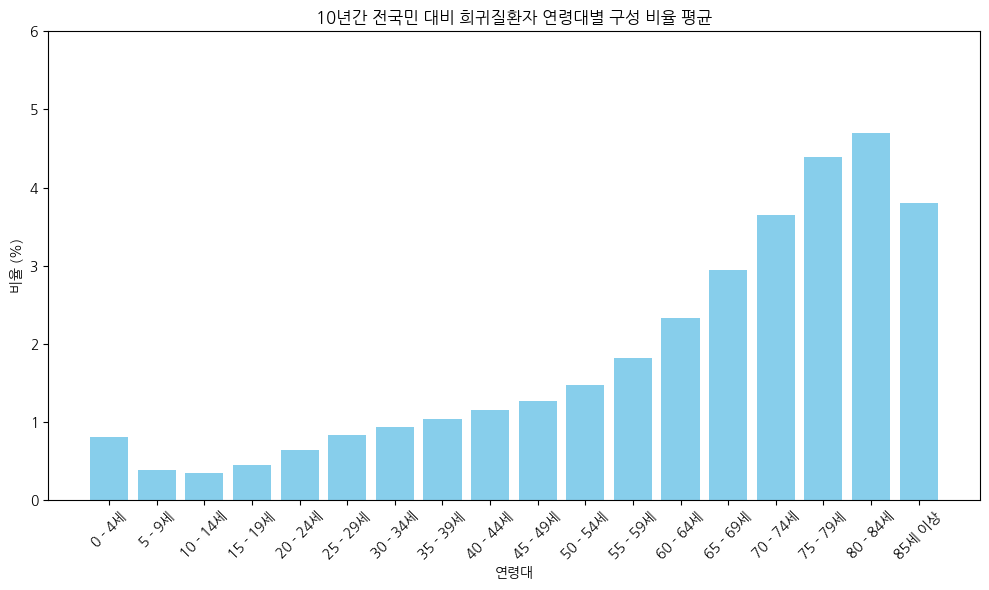

In [22]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.bar(age_avg.index, age_avg.values, color='skyblue') 
plt.title('10년간 전국민 대비 희귀질환자 연령대별 구성 비율 평균')  # 그래프 제목
plt.xlabel('연령대')  # x축 라벨
plt.ylabel('비율 (%)')  # y축 라벨
plt.xticks(rotation=45)  # x축 라벨 회전
plt.ylim(0, 6)  # y축 범위 설정
plt.tight_layout()  # 레이아웃 조정
plt.show()  # 그래프 표시

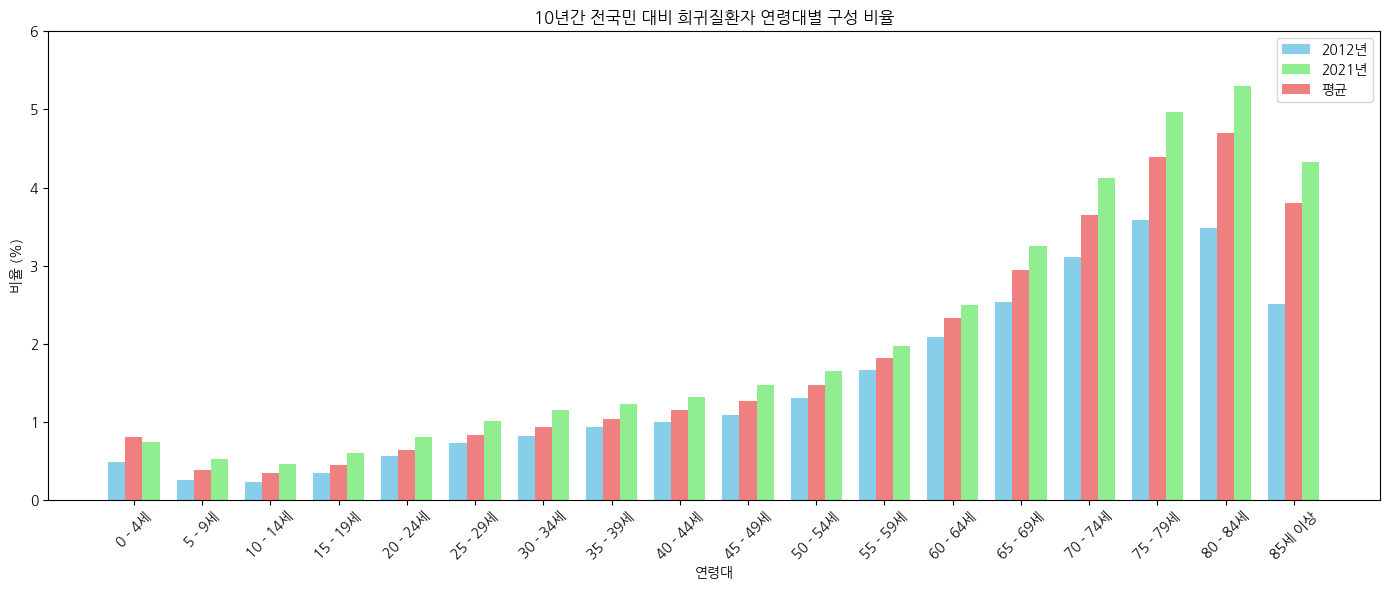

In [23]:
import numpy as np

plt.figure(figsize=(14, 6))  # 그래프 크기 설정

# 막대의 너비
bar_width = 0.25

# x축 위치 설정
x = np.arange(len(ratio_df.columns[2:]))

# 2012년 데이터
plt.bar(x - bar_width, ratio_df.iloc[0, 2:], color='skyblue', width=bar_width, label='2012년')

# 2021년 데이터
plt.bar(x+ bar_width, ratio_df.iloc[9, 2:], color='lightgreen', width=bar_width, label='2021년')

# 10년간 평균 데이터
plt.bar(x, age_avg, color='lightcoral', width=bar_width, label='평균')

plt.title('10년간 전국민 대비 희귀질환자 연령대별 구성 비율')  # 그래프 제목
plt.xlabel('연령대')  # x축 라벨
plt.ylabel('비율 (%)')  # y축 라벨
plt.xticks(x, ratio_df.columns[2:], rotation=45)  # x축 라벨 회전
plt.ylim(0, 6)  # y축 범위 설정
plt.legend()  # 범례 표시
plt.tight_layout()  # 레이아웃 조정
plt.show()  # 그래프 표시


## 일반 진료비 대비 희귀질환 진료비 비교

### 대상 데이터 프레임 전처리

In [27]:
df_total_cost = pd.read_csv("../csv/2012_2021_22대_분류별_진료현황_총진료비.csv")
df_total_cost = df_total_cost.drop(index=0)
df_total_cost = df_total_cost.reset_index(drop=True)
# 3번째 컬럼부터 마지막 컬럼까지 각 컬럼을 정수형으로 변환
df_total_cost.iloc[:, 2:] = df_total_cost.iloc[:, 2:].astype(int)
df_total_cost.iloc[:, 2:] = df_total_cost.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
df_total_cost = df_total_cost.round(0)
df_total_cost

,질병22대분류별(1),진료형태별(1),2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,계,계,46322753832,48708494214,52581305879,56358255846,62650434488,68109461292,75083107915,82990568999,83732461199,92308501084
1,계,입원,16535654429,17490104498,19055197713,20903730099,23479513202,25662987085,28510854274,31731665711,32443676672,34902328938
2,계,외래,29787099403,31218389716,33526108166,35454525747,39170921286,42446474207,46572253640,51258903287,51288784527,57406172147
3,특정감염성 및 기생충성 질환(A00-B99),계,1577658908,1567084421,1776206340,1908986043,2188649119,2277142512,2401196030,2569131257,2348260048,2487206932
4,특정감염성 및 기생충성 질환(A00-B99),입원,434278079,460824591,491809697,549536450,636130324,690449364,767295794,885596688,799212580,871485400
...,...,...,...,...,...,...,...,...,...,...,...,...
64,특수목적코드(U00-U99),입원,7654405,4745268,5011131,6263841,3638812,1506129,856153,4736430,213884757,1038540672
65,특수목적코드(U00-U99),외래,3348985,2115892,2635556,3978237,2254161,1336462,1895905,1512934,5247754,90533458
66,기타,계,634649036,2664239899,297280361,283113749,292086712,737400243,799711707,341212038,191898263,175157697
67,기타,입원,11641211,2513654,19700622,5265141,5717974,6072911,6974790,7303747,6571751,7501170


In [28]:
df_severe_illness_cost = pd.read_csv("../csv/2012_2021_중증질환_총급여비_컬럼변경.csv")
df_severe_illness_cost = df_severe_illness_cost.drop(index=0)
df_severe_illness_cost = df_severe_illness_cost.reset_index(drop=True)
# df_severe_illness_cost.iloc[:, 3:] = df_severe_illness_cost.iloc[:, 3:].astype(int)
df_severe_illness_cost.iloc[:, 3:] = df_severe_illness_cost.iloc[:, 3:].apply(pd.to_numeric, errors='coerce').fillna(0).astype(int)
# df_severe_illness_cost = df_severe_illness_cost.round(0)
df_severe_illness_cost[:3]

,연령별(1),성별(1),질병별(1),2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,계,계,계,8286105168,8771765364,9599245223,10616797284,12028136413,13466915883,15038225950,17258710898,18344952471,20002021514
1,계,계,암질환,4387049179,4564488971,4953774811,5399762803,6202588641,7001178354,7978851663,9056945892,9719420209,10665127303
2,계,계,뇌혈관,292036752,304422357,334341491,451604907,517839941,658829089,726916353,844319729,889100871,945873749


In [29]:
df_severe_illness_cost.drop(['연령별(1)', '성별(1)'], axis=1, inplace=True)
df_severe_illness_cost

,질병별(1),2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,계,8286105168,8771765364,9599245223,10616797284,12028136413,13466915883,15038225950,17258710898,18344952471,20002021514
1,암질환,4387049179,4564488971,4953774811,5399762803,6202588641,7001178354,7978851663,9056945892,9719420209,10665127303
2,뇌혈관,292036752,304422357,334341491,451604907,517839941,658829089,726916353,844319729,889100871,945873749
3,심장질환,679860988,708866495,769313767,872154497,1023477138,1154739548,1276510021,1444028880,1481801604,1651390513
4,희귀난치성질환,2898693741,3163867233,3509785831,3854154730,4241001146,4608370888,5057752874,5605294002,5834215392,6320328957
5,중증화상,28464508,30120308,32029323,39120346,43229546,50719651,54235333,51784252,68334274,34374216
6,중증외상,0,0,0,0,0,0,0,66836284,78555438,85242823
7,중증치매,0,0,0,0,0,0,0,0,106138788,130382791
8,결핵,0,0,0,0,0,0,0,189501859,167385895,165147782
9,잠복결핵,0,0,0,0,0,0,0,0,0,4153380


### 2012년 이후 10년간 전체 진료비 대비 희귀 난치성 질환의 진료비 비율 추이

In [30]:
columns_year = df_total_cost.columns[2:]

In [31]:
ratios = {}

In [32]:
for year in columns_year:
    # 두 데이터프레임에서 해당 연도의 값 가져오기
    value_df1 = df_total_cost[year].iloc[0]
    value_df2 = df_severe_illness_cost[year].loc[4]
    
    # 비율 계산 후 딕셔너리에 저장
    ratio = (value_df2 / value_df1) * 100
    ratios[year] = ratio

In [33]:
print("연도별 비율:")
for year, ratio in ratios.items():
    print(f"{year}: {ratio:.2f}")

연도별 비율:
2012: 6.26
2013: 6.50
2014: 6.67
2015: 6.84
2016: 6.77
2017: 6.77
2018: 6.74
2019: 6.75
2020: 6.97
2021: 6.85


In [34]:
second_ratios = {}
for year in columns_year:
    # 두 데이터프레임에서 해당 연도의 값 가져오기
    same_df1 = df_severe_illness_cost[year].iloc[0]
    same_df2 = df_severe_illness_cost[year].loc[4]
    
    # 비율 계산 후 딕셔너리에 저장
    second_ratio = (same_df2 / same_df1) * 100
    second_ratios[year] = second_ratio

In [35]:
print("연도별 비율:")
for year, second_ratio in second_ratios.items():
    print(f"{year}: {second_ratio:.2f}")

연도별 비율:
2012: 34.98
2013: 36.07
2014: 36.56
2015: 36.30
2016: 35.26
2017: 34.22
2018: 33.63
2019: 32.48
2020: 31.80
2021: 31.60


In [36]:
x = df_total_cost.columns[2:].astype(int)

In [37]:
y1_val = df_total_cost.loc[0,columns_year].values
y2_val = df_severe_illness_cost.loc[0,columns_year].values
y3_val = df_severe_illness_cost.loc[4,columns_year].values
# x와 동일한 길이의 배열 생성
y1 = np.full(len(x), y1_val)
y2 = np.full(len(x), y2_val)
y3 = np.full(len(x), y3_val)

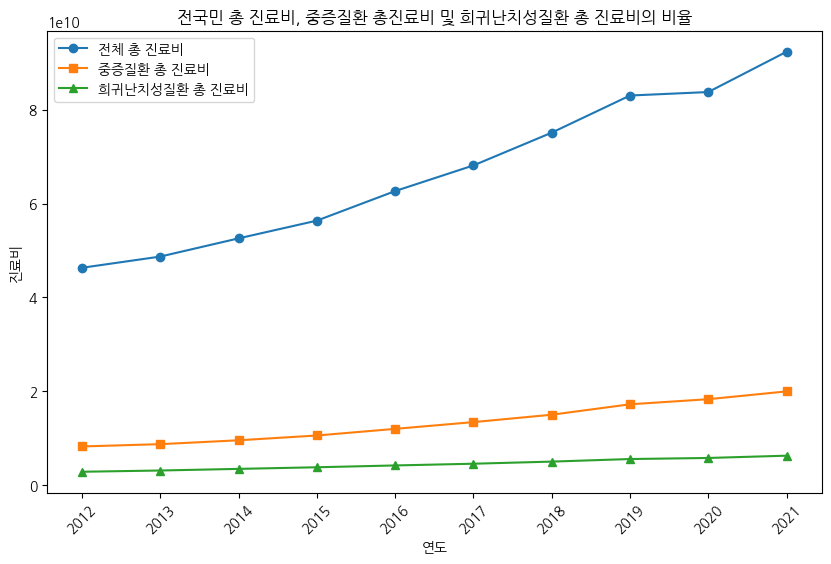

In [38]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.plot(x, y1, label='전체 총 진료비', marker='o')  # marker는 데이터 포인트를 표시
plt.plot(x, y2, label='중증질환 총 진료비', marker='s')  # marker는 데이터 포인트를 표시
plt.plot(x, y3, label='희귀난치성질환 총 진료비', marker='^')  # marker는 데이터 포인트를 표시
# 그래프 제목 및 레이블 설정
plt.title('전국민 총 진료비, 중증질환 총진료비 및 희귀난치성질환 총 진료비의 비율')
plt.xlabel('연도')
plt.ylabel('진료비')
plt.xticks(x)  # x축에 표시될 값 설정
plt.xticks(rotation=45)  # x축 라벨 회전
# 범례 표시
plt.legend()
# 그래프 표시
plt.show()



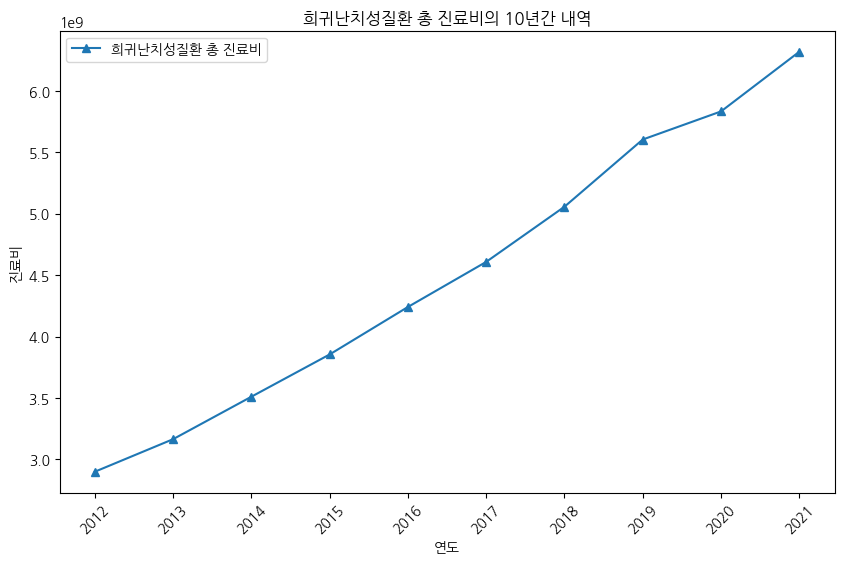

In [39]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.plot(x, y3, label='희귀난치성질환 총 진료비', marker='^')  # marker는 데이터 포인트를 표시
# 그래프 제목 및 레이블 설정
plt.title('희귀난치성질환 총 진료비의 10년간 내역')
plt.xlabel('연도')
plt.ylabel('진료비')
plt.xticks(x)  # x축에 표시될 값 설정
plt.xticks(rotation=45)  # x축 라벨 회전
# 범례 표시
plt.legend()
# 그래프 표시
plt.show()

## 전국 사망자 대비 희귀난치성환자 사망자 비교

In [42]:
df_total_dead = pd.read_csv("../csv/2012_2021_항목별_시도별사망자수.csv")
df_total_dead = df_total_dead.drop(index=[0,1])
df_total_dead = df_total_dead.reset_index(drop=True)
df_total_dead

,시점,사망원인별(104항목),성별,서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주도
0,2012,계,계,41514,20534,12352,12881,6874,6580,4567,820,50830,11030,10478,13994,13700,16766,20644,20419,3238
1,2012,"특정 감염성 및 기생충성 질환 (A00-B99, U07.1, U07.2, U10)",계,1090,575,328,301,183,156,130,21,1206,280,263,391,402,503,594,598,85
2,2012,신생물 (C00-D48),계,12664,6069,3505,3535,1980,1876,1294,218,14369,2917,2733,3729,3598,4428,5424,5740,911
3,2012,혈액 및 조혈기관질환과 면역메커니즘을 침범하는 특정장애 (D50-D89) (명),계,83,67,31,37,17,20,13,2,103,18,18,30,24,35,52,67,9
4,2012,"내분비, 영양 및 대사 질환 (E00-E88)",계,2080,871,555,725,301,269,188,31,2929,588,347,559,548,891,727,795,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2021,"임신, 출산 및 산후기 (O00-O99)",계,5,1,1,1,0,1,0,0,9,0,2,2,0,1,0,0,1
196,2021,출생전후기에 기원한 특정병태 (P00-P96),계,42,27,25,17,5,6,4,3,83,11,12,12,11,11,16,20,4
197,2021,"선천 기형, 변형 및 염색체 이상 (Q00-Q99)",계,47,27,10,19,8,8,8,0,61,10,11,8,8,12,18,20,5
198,2021,"달리 분류되지 않은 증상, 징후 (R00-R99)",계,5587,1569,1678,2010,975,1544,375,202,8280,1577,1756,2471,2092,2458,2612,2044,603


In [43]:
df_total_dead.drop('성별', axis=1, inplace=True)
df_total_dead.iloc[:, 2:] = df_total_dead.iloc[:, 2:].astype(int)
df_total_dead.iloc[:, 2:] = df_total_dead.iloc[:, 2:].apply(pd.to_numeric, errors='coerce')
df_total_dead = df_total_dead.round(0)
df_total_dead

,시점,사망원인별(104항목),서울특별시,부산광역시,대구광역시,인천광역시,광주광역시,대전광역시,울산광역시,세종특별자치시,경기도,강원도,충청북도,충청남도,전라북도,전라남도,경상북도,경상남도,제주도
0,2012,계,41514,20534,12352,12881,6874,6580,4567,820,50830,11030,10478,13994,13700,16766,20644,20419,3238
1,2012,"특정 감염성 및 기생충성 질환 (A00-B99, U07.1, U07.2, U10)",1090,575,328,301,183,156,130,21,1206,280,263,391,402,503,594,598,85
2,2012,신생물 (C00-D48),12664,6069,3505,3535,1980,1876,1294,218,14369,2917,2733,3729,3598,4428,5424,5740,911
3,2012,혈액 및 조혈기관질환과 면역메커니즘을 침범하는 특정장애 (D50-D89) (명),83,67,31,37,17,20,13,2,103,18,18,30,24,35,52,67,9
4,2012,"내분비, 영양 및 대사 질환 (E00-E88)",2080,871,555,725,301,269,188,31,2929,588,347,559,548,891,727,795,139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2021,"임신, 출산 및 산후기 (O00-O99)",5,1,1,1,0,1,0,0,9,0,2,2,0,1,0,0,1
196,2021,출생전후기에 기원한 특정병태 (P00-P96),42,27,25,17,5,6,4,3,83,11,12,12,11,11,16,20,4
197,2021,"선천 기형, 변형 및 염색체 이상 (Q00-Q99)",47,27,10,19,8,8,8,0,61,10,11,8,8,12,18,20,5
198,2021,"달리 분류되지 않은 증상, 징후 (R00-R99)",5587,1569,1678,2010,975,1544,375,202,8280,1577,1756,2471,2092,2458,2612,2044,603


In [44]:
dfs = pd.read_csv('../../csv/2012_2021_298_신경질환_연령별_급여현황_총계.csv',encoding="CP949")
dfs

,질병298분류별(1),진료형태별,2012,2012.1,2012.2,2012.3,2012.4,2012.5,2012.6,2012.7,...,2012.10,2012.11,2012.12,2012.13,2012.14,2012.15,2012.16,2012.17,2012.18,2012.19
0,질병298분류별(1),진료형태별,합계,합계,합계,합계,합계,65 - 69세,65 - 69세,65 - 69세,...,70 - 74세,70 - 74세,70 - 74세,70 - 74세,70 - 74세,75세 이상,75세 이상,75세 이상,75세 이상,75세 이상
1,질병298분류별(1),진료형태별,진료실인원 (명),내원일수 (일),급여일수 (일),진료비 (천원),급여비 (천원),진료실인원 (명),내원일수 (일),급여일수 (일),...,진료실인원 (명),내원일수 (일),급여일수 (일),진료비 (천원),급여비 (천원),진료실인원 (명),내원일수 (일),급여일수 (일),진료비 (천원),급여비 (천원)
2,총계,계,45764919,849575212,6728478238,46322753832,34616590233,1776243,62010149,700897257,...,1649440,69412237,750567587,4585953473,3527981238,2097303,105523130,965982636,7360439376,5591148731
3,총계,입원,6225566,114744004,171757062,16535654429,13541130327,352100,8180123,13157511,...,397777,11208460,16700242,1825150636,1493582003,664211,36376379,44592038,4034574468,3170809264
4,총계,외래,45626482,734831208,6556721176,29787099403,21075459906,1772019,53830026,687739746,...,1641955,58203777,733867345,2760802837,2034399236,2052688,69146751,921390598,3325864908,2420339467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,뇌성마비및기타마비성증후군,입원,50865,8334928,8843853,1044843987,809458495,5062,830551,897014,...,5915,998560,1061632,128983424,99588853,25245,4527329,4680400,519934943,398690026
427,뇌성마비및기타마비성증후군,외래,51777,763207,5442983,51204984,33222649,5520,63770,668530,...,5027,53741,585308,4230049,2678470,10738,90871,1319423,8392084,5349742
428,기타신경계의질환,계,1413139,6400649,141615480,790860314,595528363,177744,775366,20043722,...,160862,742464,19936787,88971741,65490712,326801,1776792,42374709,205688887,152036135
429,기타신경계의질환,입원,91094,1605370,2245698,392981804,319071083,7864,190325,267734,...,5869,177582,245087,36960027,29404747,11539,572101,706467,94955917,74660769


In [49]:
pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 8.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


## 노인가구 비율

In [229]:
df_rate = pd.read_excel('./2015_2022_65세이상_노인가구_세대구성비율.xlsx')
df_rate

/usr/local/lib/python3.11/site-packages/openpyxl/styles/stylesheet.py:226: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,통계표명:,가구유형별 노인가구구성 1),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,단위:,"가구, %",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2015,2016,2017,2018,2019,2020,2021,2022
2,노인가구수,NaN,"3,719,624","3,867,406","4,065,109","4,237,675","4,458,123","4,732,364","5,015,574","5,331,539"
3,가구유형별 구성 비율,1세대가구,34.0,33.9,34.4,34.8,35.2,35.9,36.2,36.0
4,NaN,2세대가구,26.2,26.1,25.7,25.3,24.9,24.1,23.0,22.7
5,NaN,3세대가구,6.3,5.8,5.4,4.9,4.5,3.9,3.4,3.1
6,NaN,4세대 이상 가구,0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0
7,NaN,1인가구,32.9,33.5,33.7,34.1,34.4,35.1,36.4,37.0
8,NaN,비친족가구,0.6,0.7,0.8,0.8,1.0,1.0,1.1,1.1
9,NaN,합계,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [230]:
df_rate = df_rate.drop('통계표명:',axis=1)
df_rate = df_rate.drop(index=0)
df_rate = df_rate.reset_index(drop=True)
df_rate

,가구유형별 노인가구구성 1),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,2015,2016,2017,2018,2019,2020,2021,2022
1,NaN,"3,719,624","3,867,406","4,065,109","4,237,675","4,458,123","4,732,364","5,015,574","5,331,539"
2,1세대가구,34.0,33.9,34.4,34.8,35.2,35.9,36.2,36.0
3,2세대가구,26.2,26.1,25.7,25.3,24.9,24.1,23.0,22.7
4,3세대가구,6.3,5.8,5.4,4.9,4.5,3.9,3.4,3.1
5,4세대 이상 가구,0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0
6,1인가구,32.9,33.5,33.7,34.1,34.4,35.1,36.4,37.0
7,비친족가구,0.6,0.7,0.8,0.8,1.0,1.0,1.1,1.1
8,합계,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
9,"통계청,「인구총조사」",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [231]:
df_rate = df_rate.drop(index=[9,10])
df_rate

,가구유형별 노인가구구성 1),Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,2015,2016,2017,2018,2019,2020,2021,2022
1,NaN,"3,719,624","3,867,406","4,065,109","4,237,675","4,458,123","4,732,364","5,015,574","5,331,539"
2,1세대가구,34.0,33.9,34.4,34.8,35.2,35.9,36.2,36.0
3,2세대가구,26.2,26.1,25.7,25.3,24.9,24.1,23.0,22.7
4,3세대가구,6.3,5.8,5.4,4.9,4.5,3.9,3.4,3.1
5,4세대 이상 가구,0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0
6,1인가구,32.9,33.5,33.7,34.1,34.4,35.1,36.4,37.0
7,비친족가구,0.6,0.7,0.8,0.8,1.0,1.0,1.1,1.1
8,합계,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [232]:
df_rate.rename(columns={'가구유형별 노인가구구성 1)': '노인가구수','Unnamed: 2': '2015','Unnamed: 3': '2016','Unnamed: 4': '2017','Unnamed: 5': '2018','Unnamed: 6': '2019','Unnamed: 7': '2020','Unnamed: 8': '2021','Unnamed: 9': '2022'}, inplace=True)
df_rate

,노인가구수,2015,2016,2017,2018,2019,2020,2021,2022
0,NaN,2015,2016,2017,2018,2019,2020,2021,2022
1,NaN,"3,719,624","3,867,406","4,065,109","4,237,675","4,458,123","4,732,364","5,015,574","5,331,539"
2,1세대가구,34.0,33.9,34.4,34.8,35.2,35.9,36.2,36.0
3,2세대가구,26.2,26.1,25.7,25.3,24.9,24.1,23.0,22.7
4,3세대가구,6.3,5.8,5.4,4.9,4.5,3.9,3.4,3.1
5,4세대 이상 가구,0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0
6,1인가구,32.9,33.5,33.7,34.1,34.4,35.1,36.4,37.0
7,비친족가구,0.6,0.7,0.8,0.8,1.0,1.0,1.1,1.1
8,합계,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [233]:
df_rate = df_rate.drop(index=0)


In [234]:
df_rate = df_rate.reset_index(drop=True)
df_rate

,노인가구수,2015,2016,2017,2018,2019,2020,2021,2022
0,NaN,"3,719,624","3,867,406","4,065,109","4,237,675","4,458,123","4,732,364","5,015,574","5,331,539"
1,1세대가구,34.0,33.9,34.4,34.8,35.2,35.9,36.2,36.0
2,2세대가구,26.2,26.1,25.7,25.3,24.9,24.1,23.0,22.7
3,3세대가구,6.3,5.8,5.4,4.9,4.5,3.9,3.4,3.1
4,4세대 이상 가구,0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0
5,1인가구,32.9,33.5,33.7,34.1,34.4,35.1,36.4,37.0
6,비친족가구,0.6,0.7,0.8,0.8,1.0,1.0,1.1,1.1
7,합계,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [235]:
df_rate.iloc[0,0] = '노인가구수'
df_rate

,노인가구수,2015,2016,2017,2018,2019,2020,2021,2022
0,노인가구수,"3,719,624","3,867,406","4,065,109","4,237,675","4,458,123","4,732,364","5,015,574","5,331,539"
1,1세대가구,34.0,33.9,34.4,34.8,35.2,35.9,36.2,36.0
2,2세대가구,26.2,26.1,25.7,25.3,24.9,24.1,23.0,22.7
3,3세대가구,6.3,5.8,5.4,4.9,4.5,3.9,3.4,3.1
4,4세대 이상 가구,0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0
5,1인가구,32.9,33.5,33.7,34.1,34.4,35.1,36.4,37.0
6,비친족가구,0.6,0.7,0.8,0.8,1.0,1.0,1.1,1.1
7,합계,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [202]:

df_filtered = df_rate.drop(df_rate.index[[0, 7]])
# 막대그래프 그리기
df_filtered.plot(kind='bar', x='노인가구수')
plt.xlabel('노인가구수')  # x축 라벨
plt.ylabel('비율')  # y축 라벨
plt.title('가구 구성비')  # 그래프 제목
plt.xticks(rotation=0)  # x축 레이블 회전 설정 (0도로 설정하여 가로로 표시)
plt.show()


TypeError: no numeric data to plot

In [203]:
for col in range(1,9):
    df_rate.iloc[:, col] = pd.to_numeric(df_rate.iloc[:, col].str.replace(',', ''), errors='coerce')


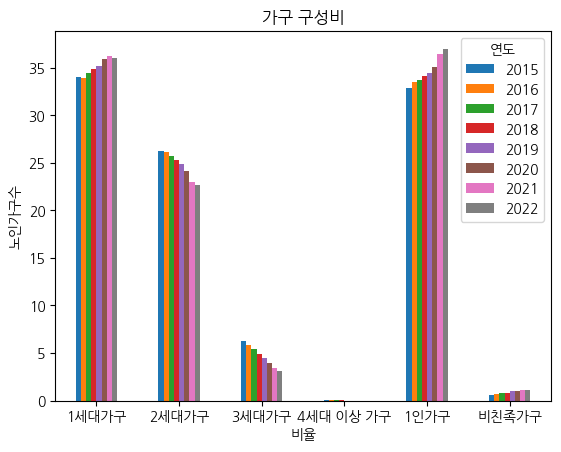

In [152]:
# 0번과 7번 레코드를 제외하고 데이터프레임을 필터링
df_filtered = df_rate.drop(df_rate.index[[0, 7]])

# 필터링된 데이터프레임으로 막대그래프 그리기
df_filtered.plot(kind='bar')
plt.xlabel('노인가구수')  # x축 라벨
plt.ylabel('비율')  # y축 라벨
plt.title('가구 구성비')  # 그래프 제목
plt.xticks(rotation=0)  # x축 레이블 회전 설정
plt.legend(title='연도')  # 범례 제목 설정
plt.show()


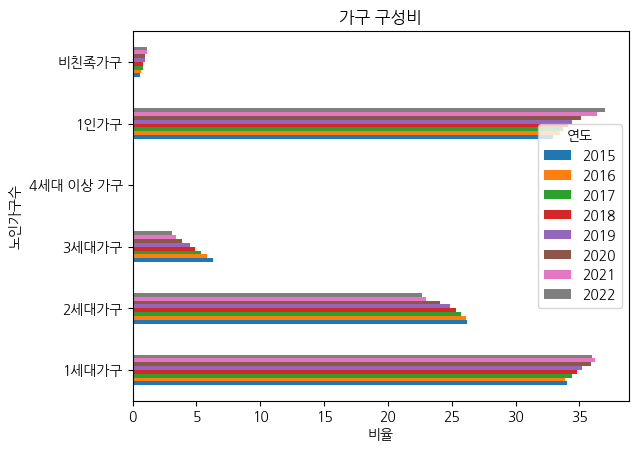

In [153]:
# 0번과 7번 레코드를 제외하고 데이터프레임을 필터링
df_filtered = df_rate.drop(df_rate.index[[0, 7]])

# 필터링된 데이터프레임으로 가로 막대그래프 그리기
df_filtered.plot(kind='barh')  # 'barh'는 가로 막대그래프를 의미
plt.ylabel('노인가구수')  # y축 라벨 (원래 x축이었음)
plt.xlabel('비율')  # x축 라벨 (원래 y축이었음)
plt.title('가구 구성비')  # 그래프 제목
plt.yticks(rotation=0)  # y축 레이블 회전 설정 (가로 막대그래프에서는 y축 레이블을 조정)
plt.legend(title='연도')  # 범례 제목 설정
plt.show()


In [220]:
df_rate

,노인가구수,2015,2016,2017,2018,2019,2020,2021,2022
0,노인가구수,"3,719,624","3,867,406","4,065,109","4,237,675","4,458,123","4,732,364","5,015,574","5,331,539"
1,1세대가구,34.0,33.9,34.4,34.8,35.2,35.9,36.2,36.0
2,2세대가구,26.2,26.1,25.7,25.3,24.9,24.1,23.0,22.7
3,3세대가구,6.3,5.8,5.4,4.9,4.5,3.9,3.4,3.1
4,4세대 이상 가구,0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0
5,1인가구,32.9,33.5,33.7,34.1,34.4,35.1,36.4,37.0
6,비친족가구,0.6,0.7,0.8,0.8,1.0,1.0,1.1,1.1
7,합계,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [170]:
columns_year = df_rate.columns[1:]

In [171]:
ratios = {}

In [168]:
x = df_rate.columns[1:].astype(int)

In [172]:
y= df_rate.loc[5,columns_year].values

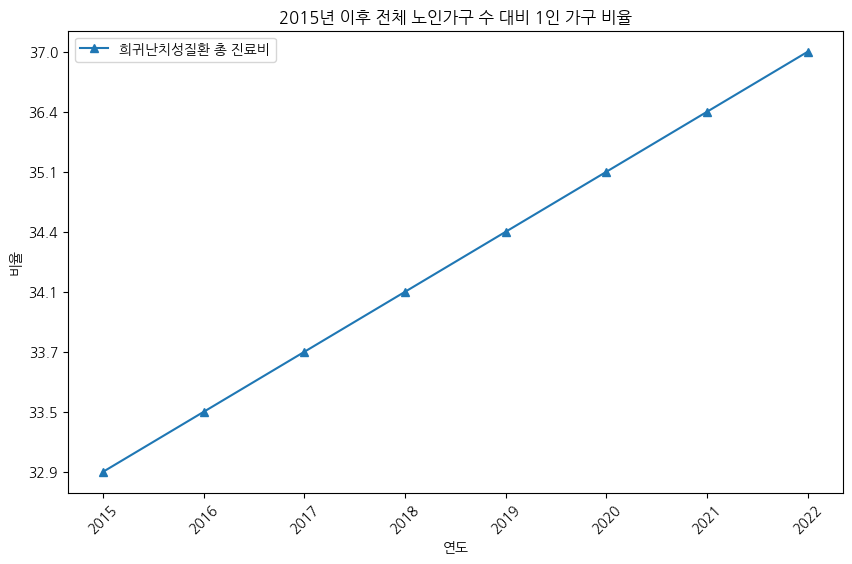

In [174]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.plot(x, y, label='희귀난치성질환 총 진료비', marker='^')  # marker는 데이터 포인트를 표시
# 그래프 제목 및 레이블 설정
plt.title('2015년 이후 전체 노인가구 수 대비 1인 가구 비율')
plt.xlabel('연도')
plt.ylabel('비율')
plt.xticks(x)  # x축에 표시될 값 설정
plt.xticks(rotation=45)  # x축 라벨 회전
# 범례 표시
plt.legend()
# 그래프 표시
plt.show()

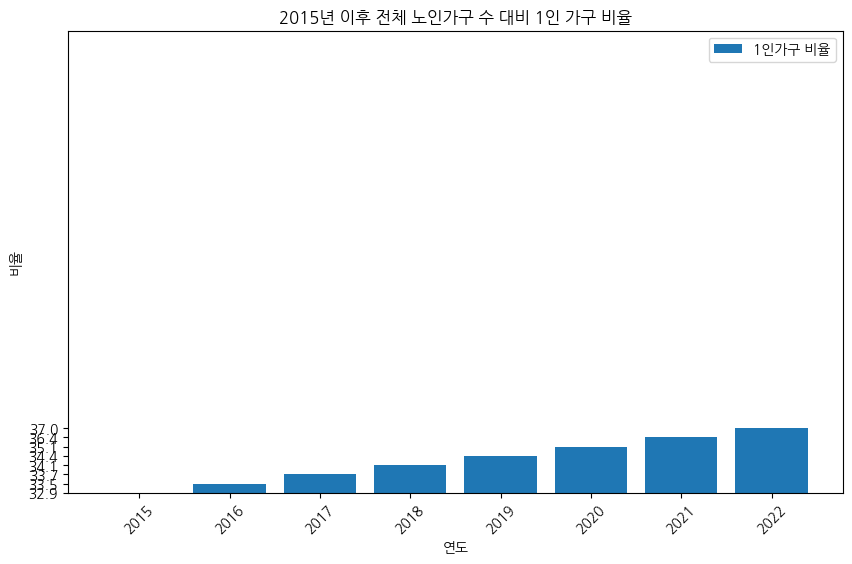

In [184]:
plt.figure(figsize=(10, 6))  # 그래프 크기 설정
plt.bar(x, y, label='1인가구 비율')  # marker는 데이터 포인트를 표시
plt.gca().set_ylim(0, 50)
plt.ylim(0,50)
# 그래프 제목 및 레이블 설정
plt.title('2015년 이후 전체 노인가구 수 대비 1인 가구 비율')
plt.xlabel('연도')
plt.ylabel('비율')
plt.xticks(x)  # x축에 표시될 값 설정
plt.xticks(rotation=45)  # x축 라벨 회전
# 범례 표시
plt.legend()
# 그래프 표시
plt.show()

In [236]:
df_rate.loc[len(df_rate)] = ['1인가구수','1,223,169','1,294,453','1,370,962','1,444,588','1,532,847','1,660,711','1,824,434','1,973,416']
df_rate

,노인가구수,2015,2016,2017,2018,2019,2020,2021,2022
0,노인가구수,"3,719,624","3,867,406","4,065,109","4,237,675","4,458,123","4,732,364","5,015,574","5,331,539"
1,1세대가구,34.0,33.9,34.4,34.8,35.2,35.9,36.2,36.0
2,2세대가구,26.2,26.1,25.7,25.3,24.9,24.1,23.0,22.7
3,3세대가구,6.3,5.8,5.4,4.9,4.5,3.9,3.4,3.1
4,4세대 이상 가구,0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0
5,1인가구,32.9,33.5,33.7,34.1,34.4,35.1,36.4,37.0
6,비친족가구,0.6,0.7,0.8,0.8,1.0,1.0,1.1,1.1
7,합계,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
8,1인가구수,"1,223,169","1,294,453","1,370,962","1,444,588","1,532,847","1,660,711","1,824,434","1,973,416"


In [237]:
df_rate

,노인가구수,2015,2016,2017,2018,2019,2020,2021,2022
0,노인가구수,"3,719,624","3,867,406","4,065,109","4,237,675","4,458,123","4,732,364","5,015,574","5,331,539"
1,1세대가구,34.0,33.9,34.4,34.8,35.2,35.9,36.2,36.0
2,2세대가구,26.2,26.1,25.7,25.3,24.9,24.1,23.0,22.7
3,3세대가구,6.3,5.8,5.4,4.9,4.5,3.9,3.4,3.1
4,4세대 이상 가구,0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0
5,1인가구,32.9,33.5,33.7,34.1,34.4,35.1,36.4,37.0
6,비친족가구,0.6,0.7,0.8,0.8,1.0,1.0,1.1,1.1
7,합계,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
8,1인가구수,"1,223,169","1,294,453","1,370,962","1,444,588","1,532,847","1,660,711","1,824,434","1,973,416"


In [264]:
record_to_move = df_rate.iloc[8].copy()

# 8번 레코드 삭제
df_rate_2 = df_rate.drop(df_rate.index[8])
df_rate_2 = pd.concat([df_rate_2.iloc[:1], pd.DataFrame([record_to_move]), df_rate_2.iloc[1:]]).reset_index(drop=True)
df_rate_2


,노인가구수,2015,2016,2017,2018,2019,2020,2021,2022
0,노인가구수,"3,719,624","3,867,406","4,065,109","4,237,675","4,458,123","4,732,364","5,015,574","5,331,539"
1,1인가구수,"1,223,169","1,294,453","1,370,962","1,444,588","1,532,847","1,660,711","1,824,434","1,973,416"
2,1세대가구,34.0,33.9,34.4,34.8,35.2,35.9,36.2,36.0
3,2세대가구,26.2,26.1,25.7,25.3,24.9,24.1,23.0,22.7
4,3세대가구,6.3,5.8,5.4,4.9,4.5,3.9,3.4,3.1
5,4세대 이상 가구,0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0
6,1인가구,32.9,33.5,33.7,34.1,34.4,35.1,36.4,37.0
7,비친족가구,0.6,0.7,0.8,0.8,1.0,1.0,1.1,1.1
8,합계,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [265]:
for col in range(1,9):
    df_rate_2.iloc[:, col] = pd.to_numeric(df_rate_2.iloc[:, col].str.replace(',', ''), errors='coerce')
df_rate_2

,노인가구수,2015,2016,2017,2018,2019,2020,2021,2022
0,노인가구수,3719624.0,3867406.0,4065109.0,4237675.0,4458123.0,4732364.0,5015574.0,5331539.0
1,1인가구수,1223169.0,1294453.0,1370962.0,1444588.0,1532847.0,1660711.0,1824434.0,1973416.0
2,1세대가구,34.0,33.9,34.4,34.8,35.2,35.9,36.2,36.0
3,2세대가구,26.2,26.1,25.7,25.3,24.9,24.1,23.0,22.7
4,3세대가구,6.3,5.8,5.4,4.9,4.5,3.9,3.4,3.1
5,4세대 이상 가구,0.1,0.1,0.1,0.1,0.0,0.0,0.0,0.0
6,1인가구,32.9,33.5,33.7,34.1,34.4,35.1,36.4,37.0
7,비친족가구,0.6,0.7,0.8,0.8,1.0,1.0,1.1,1.1
8,합계,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [266]:
from matplotlib.ticker import FuncFormatter

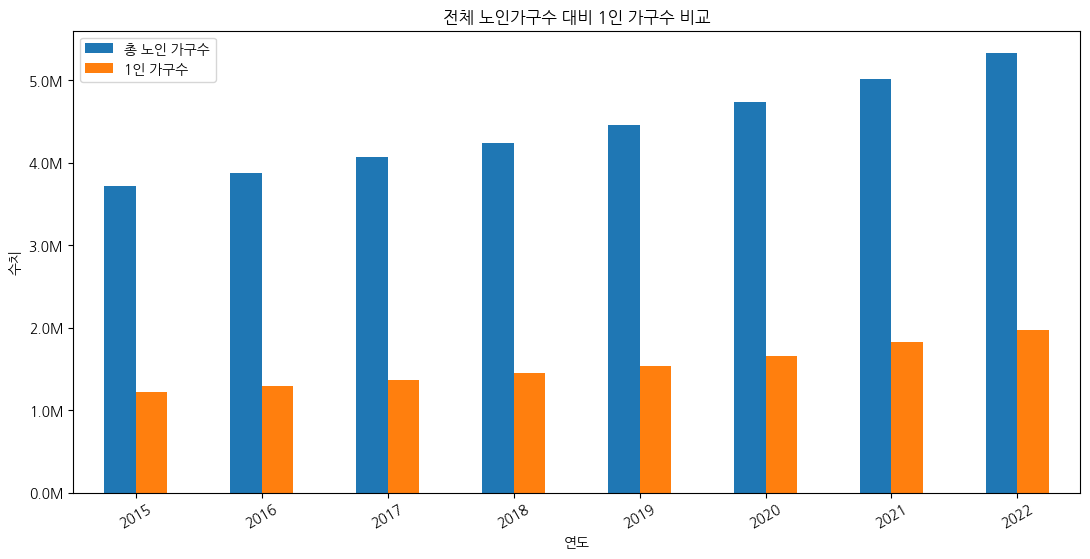

In [267]:
# 1번 컬럼부터 9번 컬럼까지의 데이터 선택
# pandas에서 컬럼 인덱싱은 0부터 시작하므로 'B'부터 'J'까지 선택합니다.

selected_data = df_rate_2.loc[:1, '2015':'2022']

# 막대그래프 그리기

selected_data.T.plot(kind='bar', figsize=(13, 6))
plt.title('전체 노인가구수 대비 1인 가구수 비교')
plt.xlabel('연도')
plt.ylabel('수치')

# y축 단위를 백만으로 변경
def million_formatter(x, pos):
    return '%1.1fM' % (x * 1e-6)

plt.gca().yaxis.set_major_formatter(FuncFormatter(million_formatter))

plt.xticks(rotation=30)
plt.legend(['총 노인 가구수', '1인 가구수'])
plt.show()

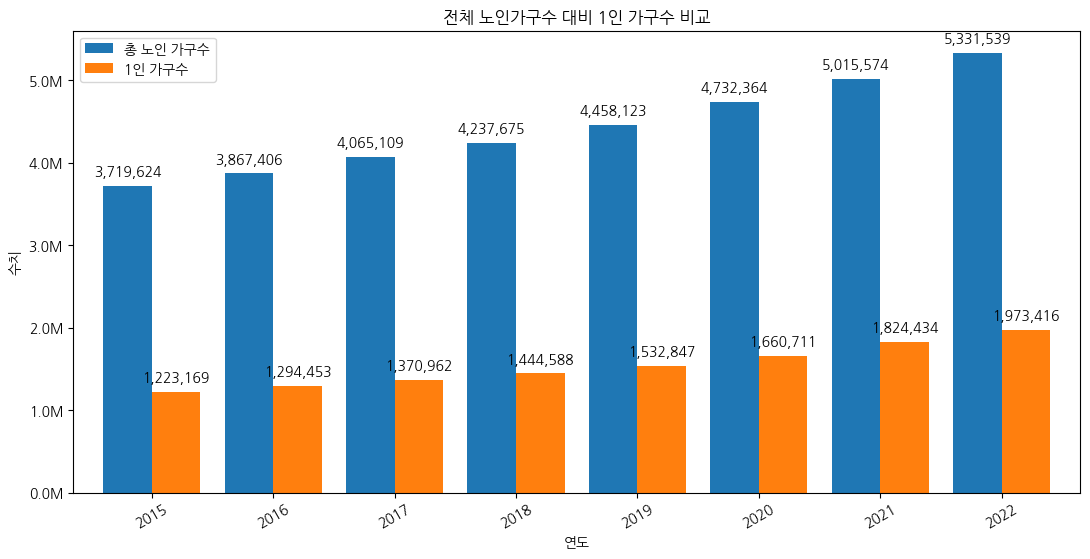

In [268]:
# 1번 컬럼부터 9번 컬럼까지의 데이터 선택
selected_data = df_rate_2.loc[:1, '2015':'2022']

# 막대그래프 그리기
ax = selected_data.T.plot(kind='bar', figsize=(13, 6), width=0.8) # width 파라미터 조절은 여기서 바로 적용할 수 없으나, 예시로 넣어두었습니다.
plt.title('전체 노인가구수 대비 1인 가구수 비교')
plt.xlabel('연도')
plt.ylabel('수치')

# y축 단위를 백만으로 변경
def million_formatter(x, pos):
    return '%1.1fM' % (x * 1e-6)
plt.gca().yaxis.set_major_formatter(FuncFormatter(million_formatter))

# 각 막대에 값 라벨링 추가
for p in ax.patches:
    ax.annotate(f'{p.get_height():,.0f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.xticks(rotation=30)
plt.legend(['총 노인 가구수', '1인 가구수'])
plt.show()